In [3]:
import os
import re

import pandas as pd
import numpy as np
import unicodedata
import matplotlib.pyplot as plt

import nltk

# Resume

In [4]:
input_path = "data/cdiscount_train.csv.zip"
nb_line=100000  # part totale extraite du fichier initial ici déjà réduit
data_all = pd.read_csv(input_path, sep=",", nrows=nb_line)
data_all = data_all.fillna("") # pour les valeurs nulles
data_all.head()

,Categorie1,Categorie2,Categorie3,Description,Libelle,Marque
0,INFORMATIQUE,CONNECTIQUE - ALIMENTATION,BATTERIE,Batterie Acer Aspire One 751H-52Yr - Li-Ion 11...,Batterie Acer Aspire One 751H-52Yr,AUCUNE
1,TELEPHONIE - GPS,ACCESSOIRE TELEPHONE,COQUE - BUMPER - FACADE TELEPHONE,Coque rigide Bleu lagon pour ALCATEL OT / 6033...,Coque rigide Bleu lagon pour ALCATEL OT / 6033 …,MUZZANO
2,TELEPHONIE - GPS,ACCESSOIRE TELEPHONE,COQUE - BUMPER - FACADE TELEPHONE,Facades et coques CELLULAR LINE SHCKGALS 3 MIN...,Facades et coques CELLULAR LINE SHCKGALS 3 MINIP,CELLULAR LINE
3,TELEPHONIE - GPS,ACCESSOIRE TELEPHONE,COQUE - BUMPER - FACADE TELEPHONE,Coque meteore TPU LG Nexus 4 / E960,Coque meteore TPU LG Nexus 4 / E960,AUCUNE
4,TELEPHONIE - GPS,ACCESSOIRE TELEPHONE,COQUE - BUMPER - FACADE TELEPHONE,Coque souple Transparente pour LG G FLEX D959 ...,Coque souple Transparente pour LG G FLEX D959 m…,MUZZANO


In [5]:
data = data_all[["Categorie1","Description"]]
data

,Categorie1,Description
0,INFORMATIQUE,Batterie Acer Aspire One 751H-52Yr - Li-Ion 11...
1,TELEPHONIE - GPS,Coque rigide Bleu lagon pour ALCATEL OT / 6033...
2,TELEPHONIE - GPS,Facades et coques CELLULAR LINE SHCKGALS 3 MIN...
3,TELEPHONIE - GPS,Coque meteore TPU LG Nexus 4 / E960
4,TELEPHONIE - GPS,Coque souple Transparente pour LG G FLEX D959 ...
...,...,...
99995,DECO - LINGE - LUMINAIRE,Souvenirs de France - Tour Eiffel Miniature 'P...
99996,LIBRAIRIE,Fast Track to Waste-Free Manufacturing - John ...
99997,TELEPHONIE - GPS,fitBAG Bonga Girafe housse pochette pour télép...
99998,DECO - LINGE - LUMINAIRE,grand tableau minnie T 50x50 cm


In [6]:
#Mardi 4 fevrier

print(data['Categorie1'].describe())
print(data['Categorie1'].value_counts()) #comptage des valeurs

count               100000
unique                  44
top       TELEPHONIE - GPS
freq                 21325
Name: Categorie1, dtype: object
TELEPHONIE - GPS                              21325
INFORMATIQUE                                  14597
LIBRAIRIE                                     12121
VETEMENTS - LINGERIE                           6023
BIJOUX -  LUNETTES - MONTRES                   6014
DECO - LINGE - LUMINAIRE                       5866
AUTO - MOTO (NEW)                              4714
BRICOLAGE - OUTILLAGE - QUINCAILLERIE          3141
SPORT (NEW)                                    2565
ELECTROMENAGER                                 2152
JOUET (NEW)                                    2038
BAGAGERIE                                      1912
CULTURE / JEUX                                 1819
PHOTO - OPTIQUE                                1574
CHAUSSURES - ACCESSOIRES                       1391
MEUBLE                                         1383
HYGIENE - BEAUTE - PARFUM   

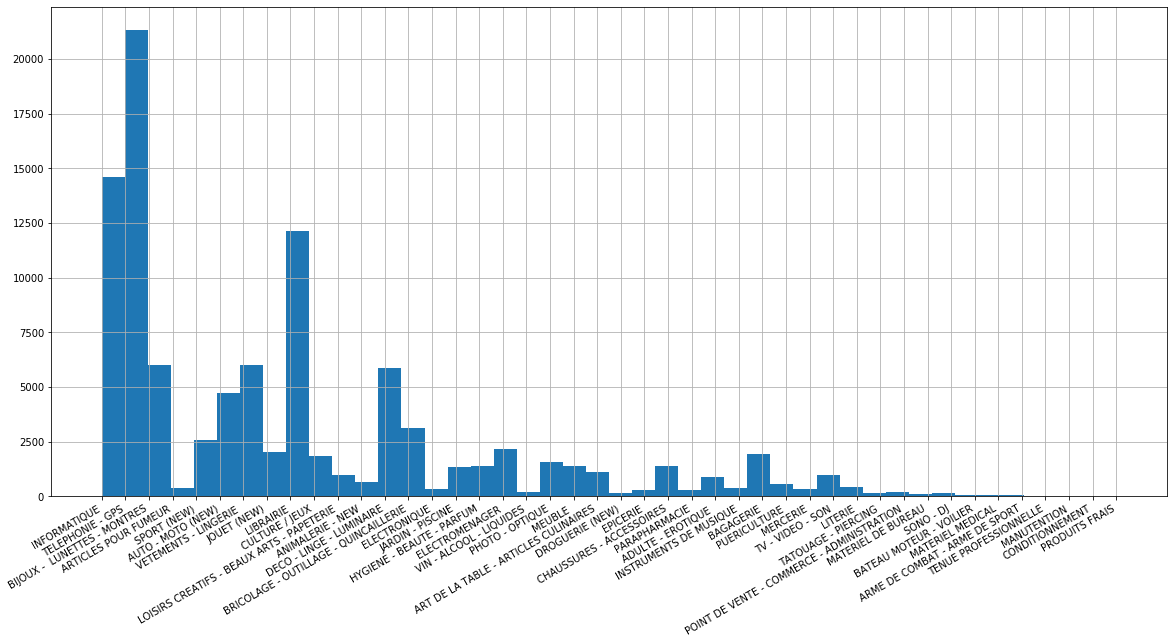

In [7]:
counts=data['Categorie1'].value_counts().tolist() #nb occurence
category=data['Categorie1'].value_counts().keys().tolist() #nom des categories


fig=plt.figure(figsize=(20,10))
data['Categorie1'].hist(bins=44)
fig.autofmt_xdate()

In [8]:
nbv=[]
mean=0
for k in range(nb_line):
    nbv+=[data['Description'][k].count(' ')+1]
    mean+=data['Description'][k].count(' ')+1
    

###  Question : print(data.['Description'].describe() / par catégorie ??

In [9]:
data[data["Categorie1"]=="TELEPHONIE - GPS"].describe()

,Categorie1,Description
count,21325,21325
unique,1,20455
top,TELEPHONIE - GPS,Câble USB 2.0 charge et synchronisation pour t...
freq,21325,39


In [13]:
#print(data['Description'][0])
#nb0=data['Description'][0].count(' ')
#print(nb0+1)

for k in range(10):
    print(nbv[k])

print("Taille moyenne du voc :", int(mean)/100000 , " mots")

16
35
25
9
33
17
21
39
26
20
Taille moyenne du voc : 25.14811  mots


### Exemple du Set pour trier et enlever les doublons

In [14]:
l = [2,2,1,3,2]
set(l)

{1, 2, 3}

### Attraper le voca d'une fiche produit

In [15]:
des = data['Description'][0]
desc = des.split(' ')
print("Nombre d'occurences dans la fiche produit 0 :", len(desc) ,"mots")    

Nombre d'occurences dans la fiche produit 0 : 16 mots


In [122]:
voca = "" 
for k in range(10):
    des = data['Description'][k]
    voca += des

### Le vocabulaire total: ensemble du vocabulaire, x occurrences uniques

In [123]:
print(voca)
voca_nb = len(voca.split(' '))
print("Nb de mots : ", voca_nb)

Batterie Acer Aspire One 751H-52Yr - Li-Ion 11.1V 5200mAh, 54Wh Noir, compatible batterie… Voir la présentationCoque rigide Bleu lagon pour ALCATEL OT / 6033 motif Drapeau Liberia + 3 Films - Coque rigide Ultra Fine Bleu lagon ORIGINALE de MUZZANO au motif Drapeau Liberia pour ALCATEL … Voir la présentationFacades et coques CELLULAR LINE SHCKGALS 3 MINIP - Marque agréée : SamsungMobile compatible : Galaxy S 3 miniMatière : Caoutchouc souple… Voir la présentationCoque meteore TPU  LG Nexus 4 / E960Coque souple Transparente pour LG G FLEX D959 motif Keep Calm And Play Football - Coque souple Ultra Fine Transparente ORIGINALE de MUZZANO au motif Keep Calm And Play Footbal… Voir la présentationCompatibilité iPhone 4, iPhone 4/4S, Caractéristiques Etuis du corps entier, Style Couleur unie, Couleur Blanc, Noir, RoseSeiko SFP599 Hommes Montre - Acheter Authentique Seiko SFP599 Regarder en ligne à un prix réduit - InfiniteShopping… Voir la présentationE-PACK FRUITÉ 'EXPERT' (Titanium bleu - Mi

### Nettoyage

In [134]:
voca_n = voca
voca_n = voca_n.lower()
voca_n = voca_n.replace(u'\u2026','.')
voca_n = voca_n.replace(u'\u00a0',' ')
print(voca_n)


batterie acer aspire one 751h-52yr - li-ion 11.1v 5200mah, 54wh noir, compatible batterie. voir la présentationcoque rigide bleu lagon pour alcatel ot / 6033 motif drapeau liberia + 3 films - coque rigide ultra fine bleu lagon originale de muzzano au motif drapeau liberia pour alcatel . voir la présentationfacades et coques cellular line shckgals 3 minip - marque agréée : samsungmobile compatible : galaxy s 3 minimatière : caoutchouc souple. voir la présentationcoque meteore tpu  lg nexus 4 / e960coque souple transparente pour lg g flex d959 motif keep calm and play football - coque souple ultra fine transparente originale de muzzano au motif keep calm and play footbal. voir la présentationcompatibilité iphone 4, iphone 4/4s, caractéristiques etuis du corps entier, style couleur unie, couleur blanc, noir, roseseiko sfp599 hommes montre - acheter authentique seiko sfp599 regarder en ligne à un prix réduit - infiniteshopping. voir la présentatione-pack fruité 'expert' (titanium bleu - mi

In [135]:
voca_n= unicodedata.normalize('NFD', voca_n).encode('ascii', 'ignore').decode("utf-8")
print(voca_n)

batterie acer aspire one 751h-52yr - li-ion 11.1v 5200mah, 54wh noir, compatible batterie. voir la presentationcoque rigide bleu lagon pour alcatel ot / 6033 motif drapeau liberia + 3 films - coque rigide ultra fine bleu lagon originale de muzzano au motif drapeau liberia pour alcatel . voir la presentationfacades et coques cellular line shckgals 3 minip - marque agreee : samsungmobile compatible : galaxy s 3 minimatiere : caoutchouc souple. voir la presentationcoque meteore tpu  lg nexus 4 / e960coque souple transparente pour lg g flex d959 motif keep calm and play football - coque souple ultra fine transparente originale de muzzano au motif keep calm and play footbal. voir la presentationcompatibilite iphone 4, iphone 4/4s, caracteristiques etuis du corps entier, style couleur unie, couleur blanc, noir, roseseiko sfp599 hommes montre - acheter authentique seiko sfp599 regarder en ligne a un prix reduit - infiniteshopping. voir la presentatione-pack fruite 'expert' (titanium bleu - mi

In [136]:
voca_n = re.sub('[^a-z_]', ' ', voca_n)
print(voca_n)

batterie acer aspire one    h   yr   li ion     v     mah    wh noir  compatible batterie  voir la presentationcoque rigide bleu lagon pour alcatel ot        motif drapeau liberia     films   coque rigide ultra fine bleu lagon originale de muzzano au motif drapeau liberia pour alcatel   voir la presentationfacades et coques cellular line shckgals   minip   marque agreee   samsungmobile compatible   galaxy s   minimatiere   caoutchouc souple  voir la presentationcoque meteore tpu  lg nexus     e   coque souple transparente pour lg g flex d    motif keep calm and play football   coque souple ultra fine transparente originale de muzzano au motif keep calm and play footbal  voir la presentationcompatibilite iphone    iphone    s  caracteristiques etuis du corps entier  style couleur unie  couleur blanc  noir  roseseiko sfp    hommes montre   acheter authentique seiko sfp    regarder en ligne a un prix reduit   infiniteshopping  voir la presentatione pack fruite  expert   titanium bleu   mi

### Questions 
- trouver les doubles dans chaque produit
- pondération des occurences en fonction de leur fréquence par catégorie
- ordre alphabétique ?
- trouver le nb moyen d'occurences par catégorie 

In [55]:
i = 0
txt = data['Description'].values[i]
print("Original Description : " + data['Description'])

0        Original Description : Batterie Acer Aspire On...
1        Original Description : Coque rigide Bleu lagon...
2        Original Description : Facades et coques CELLU...
3        Original Description : Coque meteore TPU  LG N...
4        Original Description : Coque souple Transparen...
                               ...                        
99995    Original Description : Souvenirs de France - T...
99996    Original Description : Fast Track to Waste-Fre...
99997    Original Description : fitBAG Bonga Girafe hou...
99998    Original Description : grand tableau minnie T ...
99999    Original Description : Étui en cuir avec empla...
Name: Description, Length: 100000, dtype: object


In [59]:
txt = txt.lower()
print(txt)
len(set(txt.split(" ")))

batterie acer aspire one 751h-52yr - li-ion 11.1v 5200mah, 54wh noir, compatible batterie… voir la présentation


16

In [23]:
txt = txt.replace(u'\u2026','.')    
txt = txt.replace(u'\u00a0',' ')
print(txt)

batterie acer aspire one    h   yr   li ion     v     mah    wh noir  compatible batterie  voir la presentation


In [12]:
txt = unicodedata.normalize('NFD', txt).encode('ascii', 'ignore').decode("utf-8")
print(txt)

batterie acer aspire one 751h-52yr - li-ion 11.1v 5200mah, 54wh noir, compatible batterie. voir la presentation


In [13]:
txt = re.sub('[^a-z_]', ' ', txt)
print(txt)

batterie acer aspire one    h   yr   li ion     v     mah    wh noir  compatible batterie  voir la presentation


In [16]:
## listes de mots à supprimer dans la description des produits
## Depuis NLTK
nltk.download("stopwords")
stopwords = nltk.corpus.stopwords.words('french') 

stopwords[:10]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/cecile/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle']

In [17]:
stopwords = [unicodedata.normalize('NFD', sw).encode('ascii', 'ignore').decode("utf-8") for sw in stopwords]
stopwords[:10]

['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle']

In [18]:
tokens = [w for w in txt.split() if (len(w)>2) and (w not in stopwords)]
removed_words = [w for w in txt.split() if (len(w)<2) or (w in stopwords)]

print(tokens)
print(removed_words)

['batterie', 'acer', 'aspire', 'one', 'ion', 'mah', 'noir', 'compatible', 'batterie', 'voir', 'presentation']
['h', 'v', 'la']


In [19]:
## Fonction de setmming de stemming permettant la racinisation
stemmer=nltk.stem.SnowballStemmer('french')
tokens_stem = [stemmer.stem(token) for token in tokens]
print(tokens_stem)

['batter', 'acer', 'aspir', 'one', 'ion', 'mah', 'noir', 'compatibl', 'batter', 'voir', 'present']


In [22]:
set(tokens_stem)

{'acer',
 'aspir',
 'batter',
 'compatibl',
 'ion',
 'mah',
 'noir',
 'one',
 'present',
 'voir'}